In [1]:
import os

import pandas as pd
# Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

# User defined files and classes
os.sys.path.append('../')
from src.ReLMM.read_data import Inputs
import src.ReLMM.utils_dataset as utilsd
from src.ReLMM.soa_feature_selectors import SOAFeatureSelectors

# Tick parameters
# Plotting parameters
plt.rcParams.update({
"text.usetex":True,
"font.family":"serif",
"font.serif":["Computer Modern Roman"]})
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 1

ModuleNotFoundError: No module named 'xgboost'

Reading data for the input dataset type:  SynthData
Training score:  0.915515270318871
Mean cross-validation score: 0.04
MSE: 0.8
RMSE: 0.89


/Users/nikhilthota/Desktop/lab/projects/SPIRAL/codes_and_datasets/github_repos/rxhernandez/ReLMM/jupyter_notebooks/../src/ReLMM/soa_feature_selectors.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(descriptors)
/Users/nikhilthota/Desktop/lab/projects/SPIRAL/codes_and_datasets/github_repos/rxhernandez/ReLMM/jupyter_notebooks/../src/ReLMM/soa_feature_selectors.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(descriptors)


 MSE XGBoost : 0.7972167126904901
 MSE LASSO : 0.6313203767168281


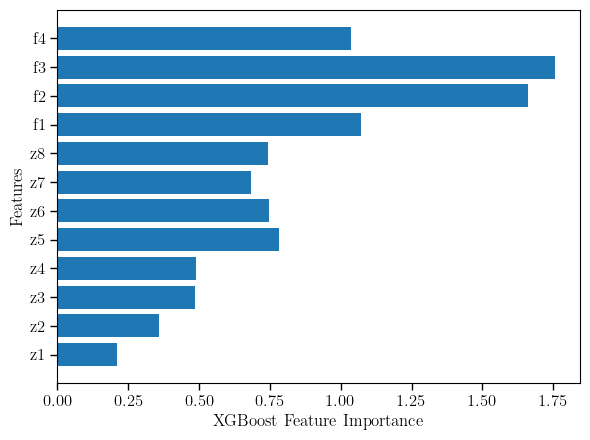

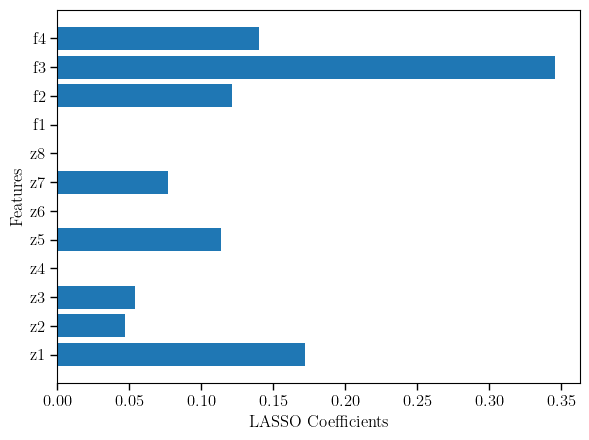

In [6]:
input_type='SynthData'
input_path='../synthetic_dataset'
input_file='synthetic_data_randomSamples_200_nonlinearf5.csv' 
output_dir='../output'
file_name_prefix=input_file.split('.csv')[0] 

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

input_data = Inputs(input_type=input_type,
                    input_path=input_path,
                    input_file=input_file)

x_data, y_data, descriptors = input_data.read_inputs()
x_stand_DT, x_stand_DT_df, scalerX = utilsd.standardize_data(x_data)
y_stand_DT, y_stand_DT_df, scalerY = utilsd.standardize_data(pd.DataFrame({'target':y_data[:,0]}))

methods = SOAFeatureSelectors(x_stand_DT, y_stand_DT, random_state=40)

feature_importance_dict_xgboost, importance_df_xgboost, mse_test_xgboost = methods.xgboost(descriptors, save_fig=True, fig_name=f'{output_dir}/{file_name_prefix}_xgboost.pdf')
feature_importance_dict_lasso, importance_df_lasso, mse_test_lasso = methods.lasso(descriptors, save_fig=True, fig_name=f'{output_dir}/{file_name_prefix}_lasso.pdf')

print(f' MSE XGBoost : {mse_test_xgboost}')
print(f' MSE LASSO : {mse_test_lasso}')
mse_df = pd.DataFrame([[mse_test_xgboost,mse_test_lasso]],columns=['MSE_xgboost','MSE_lasso'])
importance_df_xgboost.to_csv(f'{output_dir}/{file_name_prefix}_xgboost.csv')
importance_df_lasso.to_csv(f'{output_dir}/{file_name_prefix}_lasso.csv')
mse_df.to_csv(f'{output_dir}/{file_name_prefix}_soa_mse.csv')